In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving facies_data2.csv to facies_data2 (1).csv
User uploaded file "facies_data2 (1).csv" with length 196104 bytes


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("facies_data2.csv")
data.head()

Facies Formation  Well Name   Depth     GR  ILD_log10  DeltaPHI   PHIND  \
0       3     A1 SH  SHRIMPLIN  2793.0  77.45      0.664       9.9  11.915   
1       3     A1 SH  SHRIMPLIN  2793.5  78.26      0.661      14.2  12.565   
2       3     A1 SH  SHRIMPLIN  2794.0  79.05      0.658      14.8  13.050   
3       3     A1 SH  SHRIMPLIN  2794.5  86.10      0.655      13.9  13.115   
4       3     A1 SH  SHRIMPLIN  2795.0  74.58      0.647      13.5  13.300   

    PE  NM_M  RELPOS  
0  4.6     1   1.000  
1  4.1     1   0.979  
2  3.6     1   0.957  
3  3.5     1   0.936  
4  3.4     1   0.915

In [5]:
data.describe()

Facies        Depth           GR    ILD_log10     DeltaPHI  \
count  3232.000000  3232.000000  3232.000000  3232.000000  3232.000000   
mean      4.422030  2875.824567    66.135769     0.642719     3.559642   
std       2.504243   131.006274    30.854826     0.241845     5.228948   
min       1.000000  2573.500000    13.250000    -0.025949   -21.832000   
25%       2.000000  2791.000000    46.918750     0.492750     1.163750   
50%       4.000000  2893.500000    65.721500     0.624437     3.500000   
75%       6.000000  2980.000000    79.626250     0.812735     6.432500   
max       9.000000  3122.500000   361.150000     1.480000    18.600000   

             PHIND           PE         NM_M       RELPOS  
count  3232.000000  3232.000000  3232.000000  3232.000000  
mean     13.483213     3.725014     1.498453     0.520287  
std       7.698980     0.896152     0.500075     0.286792  
min       0.550000     0.200000     1.000000     0.010000  
25%       8.346750     3.100000     1.000000     0.273000  
50%      12.150000     3.551500     1.000000     0.526000  
75%      16.453750     4.300000     2.000000     0.767250  
max      84.400000     8.094000     2.000000     1.000000

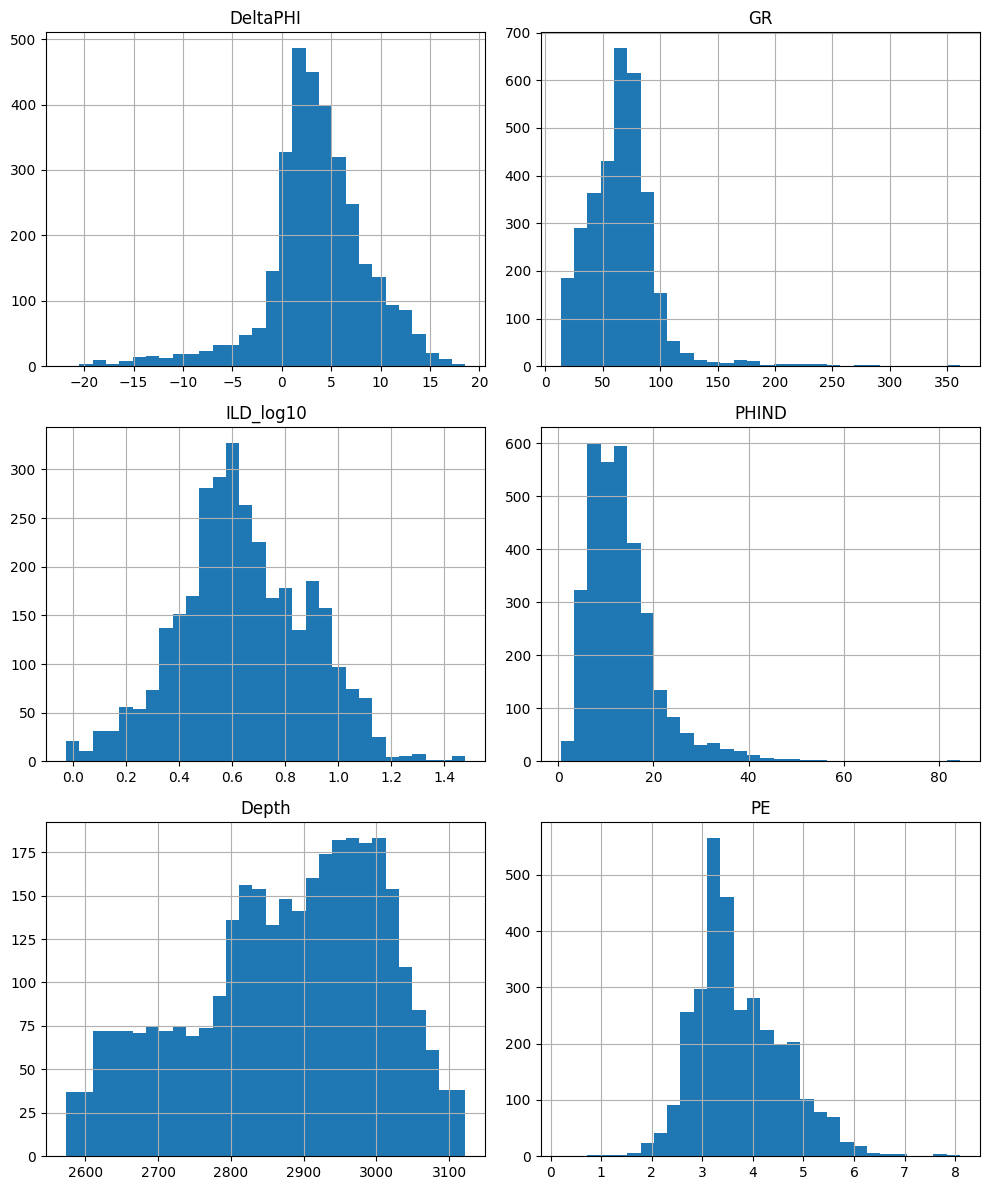

In [6]:
stat = data[['DeltaPHI','GR','ILD_log10','PHIND','Depth','PE']]
stat.hist (figsize=(10,12),bins=30)
plt.tight_layout ()
plt.show ()

1. **Grafik: DeltaPHI (Koreksi Densitas)**
Histogram ini menunjukkan besaran nilai koreksi yang diterapkan pada pembacaan alat Density Log.

Analisa Visual:

Sebagian besar data berkumpul di sekitar angka 0 hingga 5.
Namun, ada ekor (tail) yang memanjang ke arah positif (kanan).


"Grafik pertama adalah DeltaPHI. Ini adalah parameter Quality Control. Idealnya, nilai koreksi harus mendekati nol. Di sini kita melihat distribusi memuncak di dekat nol, yang artinya sebagian besar data densitas kita valid. Namun, adanya data di area positif (kanan) menunjukkan beberapa interval lubang bor mungkin mengalami kerusakan dinding (washout) atau kerak lumpur (mudcake) yang tebal, sehingga perlu koreksi lebih besar."



2. **Grafik: GR (Gamma Ray)**
Distribusi radioaktivitas alami batuan. Ini adalah indikator utama untuk membedakan jenis batuan (litologi).

Analisa Visual:

Bentuk kurva skewed right (menjuntai ke kanan).
Puncak data (modus) berada di sekitar 60-70 API.


"Selanjutnya adalah Gamma Ray (GR). Grafik ini membantu kita memisahkan Sandstone (pasir) dari Shale (lempung). Puncak data di area 60-70 API mengindikasikan bahwa formasi kita didominasi oleh batuan pasir yang mungkin sedikit kotor (shaly sand). Ekor panjang ke kanan (nilai tinggi >100) merepresentasikan lapisan-lapisan shale murni yang menyelingi reservoir kita."



3. **Grafik: ILD_log10 (Deep Resistivity - Log Scale)**
 Nilai resistivitas formasi bagian dalam (deep induction) yang sudah ditransformasi ke skala logaritma (Log10).

Analisa Visual:

Bentuk menyerupai lonceng (normal distribution).
Pusat data berada di nilai 0.6 (log10), yang setara dengan sekitar 4 ohm-m.


"Grafik ketiga adalah Resistivitas Dalam (ILD) dalam skala logaritmik. Kita menggunakan logaritma karena variasi nilai resistivitas sangat besar. Distribusi normal ini menunjukkan variasi konduktivitas batuan. Nilai yang lebih tinggi di sebelah kanan sumbu x (sekitar 1.0 atau 10 ohm-m) adalah target yang kita cari, karena biasanya mengindikasikan adanya hidrokarbon atau batuan yang sangat ketat (tight)."




4. Grafik: PHIND (Porosity Neutron-Density)** **bold text**
Nilai porositas (ruang pori dalam batuan), kemungkinan besar hasil rata-rata dari Log Neutron dan Density. Satuan sumbu X kemungkinan dalam Persen (pu).

Analisa Visual:

Puncak data sangat jelas di angka 10-15.
Data menurun tajam setelah angka 20.


"Di sini kita melihat PHIND, atau nilai Porositas. Ini adalah parameter terpenting untuk menghitung cadangan. Mayoritas data berkumpul di rentang 10% hingga 15%. Ini kabar baik, karena menunjukkan reservoir kita memiliki kapasitas penyimpanan fluida yang cukup (kualitas moderate). Nilai ekstrim di atas 30% mungkin perlu dicek ulang apakah itu porositas nyata atau efek lubang bor yang buruk."




5. Grafik: Depth (Kedalaman)**
Frekuensi pengambilan data berdasarkan kedalaman sumur.

Analisa Visual:

Bentuknya tidak beraturan (blocky), bukan distribusi normal.
Ada dua konsentrasi utama: kedalaman 2600-2750 ft dan 2800-3050 ft.


"Grafik Depth ini menunjukkan cakupan data kita secara vertikal. Kita bisa melihat bahwa sampling data atau fokus analisa kita terkonsentrasi di dua zona kedalaman utama, yaitu zona dangkal di 2600-an dan zona yang lebih dalam di 2800-an hingga 3000. Ini memberitahu kita di mana posisi reservoir target berada dalam sumur."




6. Grafik: PE (Photoelectric Effect)**
Faktor efek fotolistrik, sangat sensitif terhadap jenis mineral batuan.

Analisa Visual:
Puncak tertinggi berada tepat di angka 3.
Ada bahu (shoulder) data di sekitar angka 4-5.


"Terakhir adalah PE (Photoelectric Effect). Ini adalah 'sidik jari' mineral batuan. Nilai PE sekitar 3 adalah ciri khas batuan Pasir Kuarsa (Quartz Sandstone). Ini mengonfirmasi temuan kita di grafik Gamma Ray tadi. Adanya sedikit data di angka 5 mungkin menunjukkan kehadiran mineral semen seperti Kalsit (Limestone) atau mineral berat lainnya dalam jumlah kecil."









#
#
#
#
#
1. Graph: DeltaPHI (Density Correction)
This histogram displays the magnitude of correction values applied to the Density Log tool readings.

Visual Analysis:

Most of the data clusters around the 0 to 5 range.

However, there is a tail extending towards the positive side (right).

Script: "The first graph is DeltaPHI. This is a Quality Control parameter. Ideally, the correction value should be close to zero. Here we see the distribution peaking near zero, meaning most of our density data is valid. However, the presence of data in the positive area (to the right) indicates that some borehole intervals might be experiencing wall damage (washout) or thick mudcake, thus requiring larger corrections."

2. Graph: GR (Gamma Ray)
The distribution of natural rock radioactivity. This is the primary indicator for distinguishing rock types (lithology).

Visual Analysis:

The curve shape is skewed right.

The data peak (mode) is located around 60-70 API.

Script: "Next is Gamma Ray (GR). This graph helps us separate Sandstone from Shale. The data peak in the 60-70 API area indicates that our formation is dominated by sandstone, which might be slightly dirty (shaly sand). The long tail to the right (high values >100) represents pure shale layers interleaving our reservoir."

3. Graph: ILD_log10 (Deep Resistivity - Log Scale)
Deep formation resistivity values (deep induction) transformed into a logarithmic scale (Log10).

Visual Analysis:

The shape resembles a bell curve (normal distribution).

The data center is at 0.6 (log10), which is equivalent to approximately 4 ohm-m.

Script: "The third graph is Deep Resistivity (ILD) in a logarithmic scale. We use logarithms because the variation in resistivity values is very large. This normal distribution shows the variation in rock conductivity. Higher values on the right side of the x-axis (around 1.0 or 10 ohm-m) are the targets we are looking for, as they usually indicate the presence of hydrocarbons or very tight rocks."

4. Graph: PHIND (Porosity Neutron-Density)
Porosity values (pore space within the rock), likely the average of the Neutron and Density Logs. The X-axis unit is likely in Percent (pu).

Visual Analysis:

The data peak is very clear at the 10-15 range.

The data drops sharply after the value of 20.

Script: "Here we see PHIND, or Porosity values. This is the most important parameter for calculating reserves. The majority of the data clusters in the 10% to 15% range. This is good news, as it indicates our reservoir has sufficient fluid storage capacity (moderate quality). Extreme values above 30% might need re-checking to determine if they are real porosity or the result of bad borehole effects."

5. Graph: Depth
The frequency of data acquisition based on well depth.

Visual Analysis:

The shape is irregular (blocky), not a normal distribution.

There are two main concentrations: depths 2600-2750 ft and 2800-3050 ft.

Script: "This Depth graph shows our data coverage vertically. We can see that data sampling or our analysis focus is concentrated in two main depth zones: the shallow zone in the 2600s and the deeper zone in the 2800s to 3000s. This tells us where the target reservoirs are positioned within the well."

6. Graph: PE (Photoelectric Effect)
The photoelectric effect factor, which is very sensitive to rock mineral types.

Visual Analysis:

The highest peak is exactly at the value of 3.

There is a data shoulder around the 4-5 range.

Script: "Finally, the PE (Photoelectric Effect). This is the 'fingerprint' of rock minerals. A PE value around 3 is characteristic of Quartz Sandstone. This confirms our findings in the Gamma Ray graph earlier. The presence of some data around 5 might indicate the presence of cement minerals like Calcite (Limestone) or other heavy minerals in small quantities."

<Axes: >

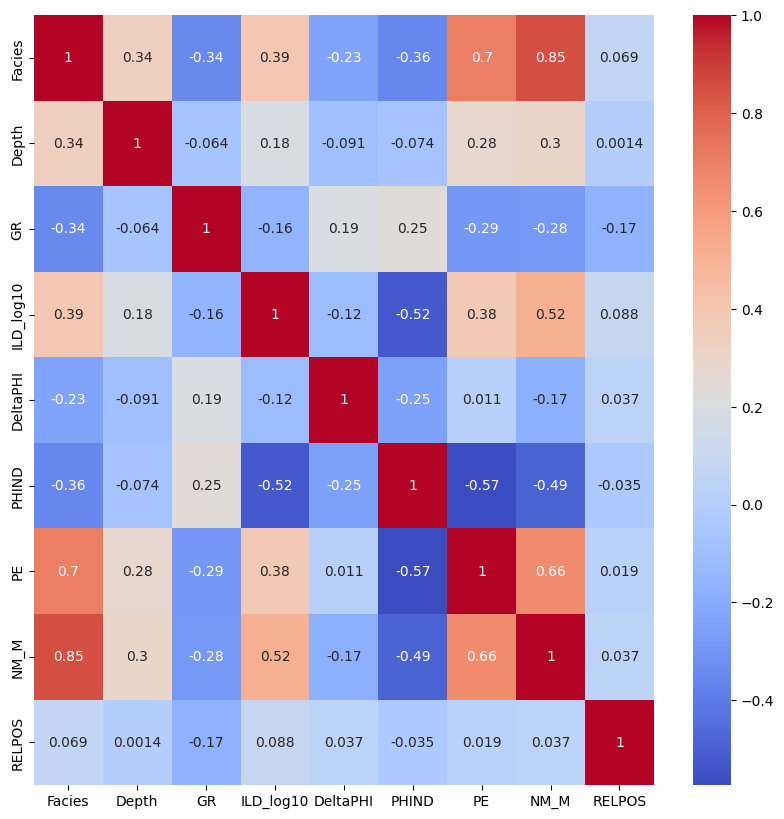

In [7]:
data2 = data.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(data2, cmap='coolwarm', annot=True)

"Heatmap ini memvisualisasikan hubungan antar parameter well log, di mana terlihat jelas bahwa NM_M (0.85) dan PE (0.70) memiliki korelasi positif terkuat terhadap target Facies, menjadikannya indikator litologi yang paling dominan dalam dataset ini. Secara petrofisika, kualitas data terkonfirmasi baik melalui hubungan negatif yang logis antara porositas (PHIND) dengan resistivitas dan PE, sementara fitur RELPOS menunjukkan korelasi yang sangat rendah terhadap variabel lain, menandakan bahwa ia membawa informasi unik dan independen yang berharga untuk memperkaya model prediksi tanpa menimbulkan redundansi."

*"This heatmap visualizes the relationship between well log parameters, where it is clear that NM_M (0.85) and PE (0.70) have the strongest positive correlation to the target Facies, making them the most dominant lithological indicators in this dataset. Petrophysically, the data quality is confirmed by the logical negative relationship between porosity (PHIND) with resistivity and PE, while the RELPOS feature shows very low correlation to other variables, indicating that it brings unique and independent information that is valuable to enrich the prediction model without causing redundancy."*

In [8]:
data = data.sort_values("Depth").reset_index(drop=True)

depth = data["Depth"]
GR = data["GR"]
ILD_log10 = data["ILD_log10"]
DeltaPHI = data["DeltaPHI"]
PHIND = data["PHIND"]
PE = data["PE"]

Text(0, 0.5, 'Depth')

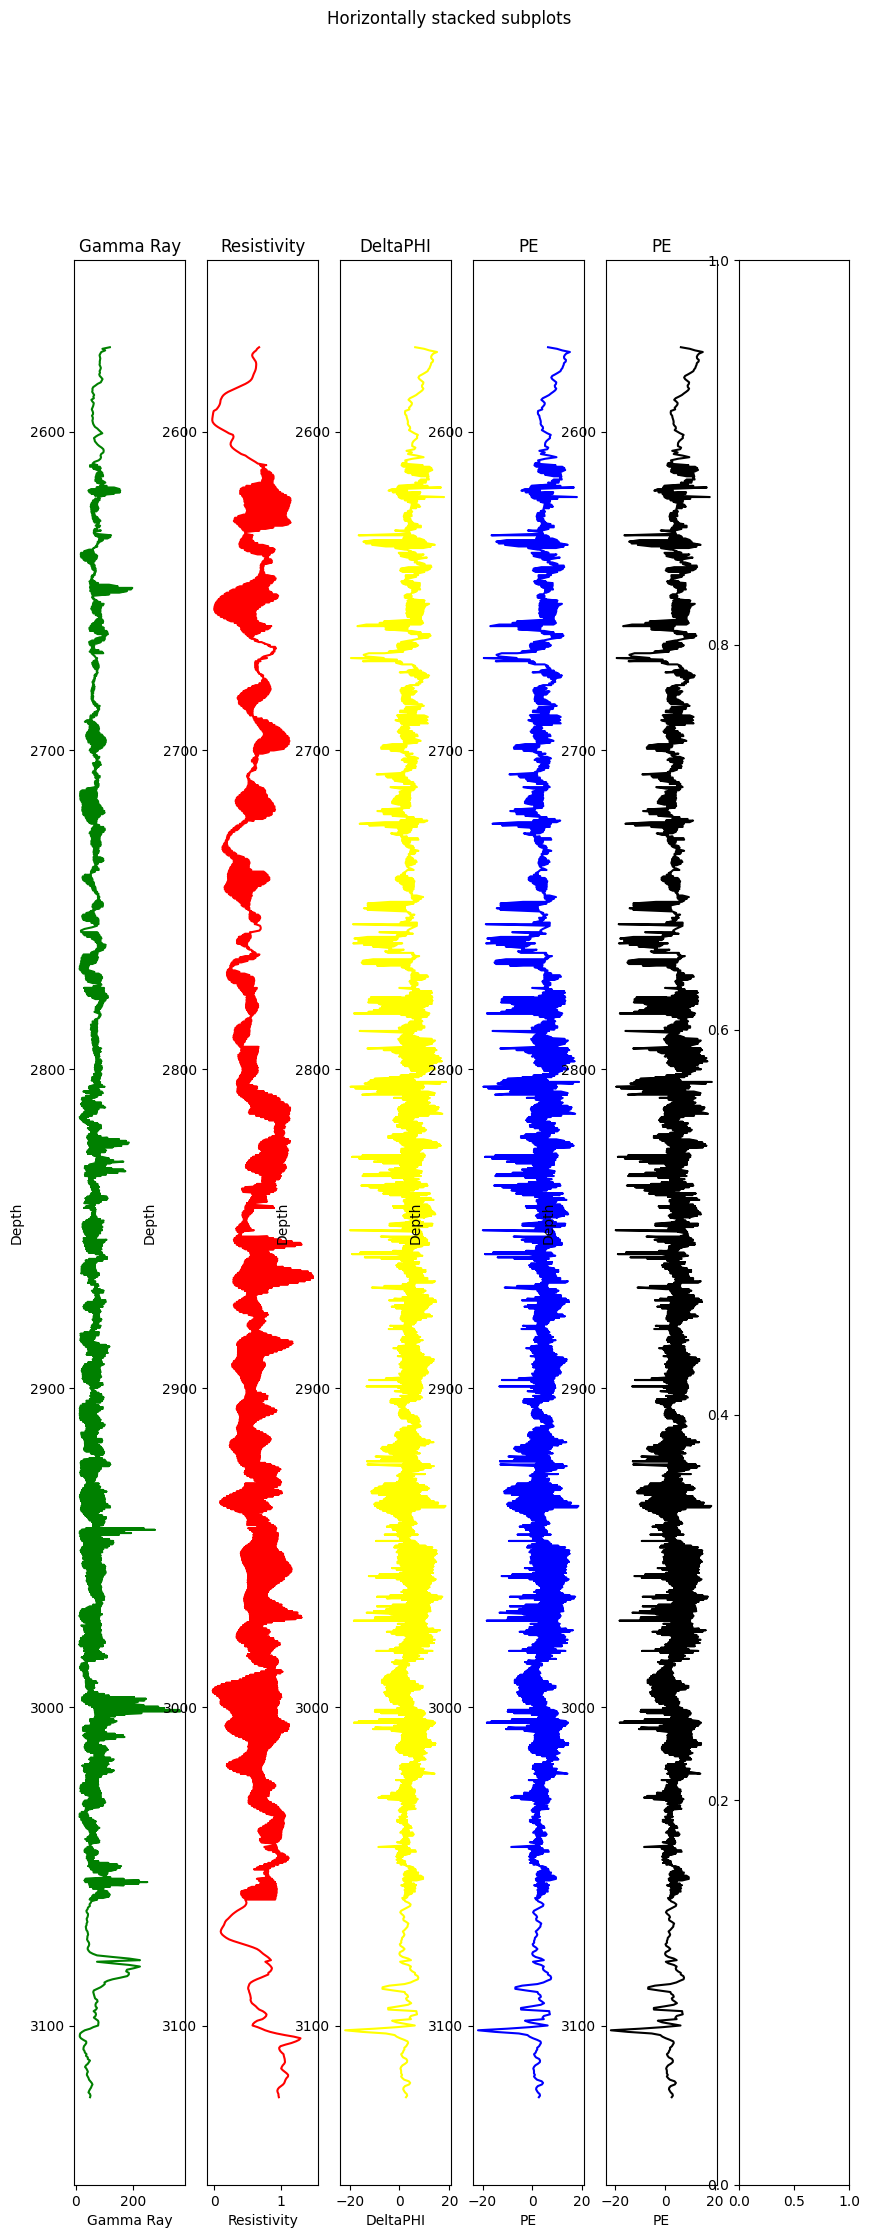

In [9]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(10,25))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(GR, depth, color='green')
ax1.invert_yaxis()
ax1.set_title('Gamma Ray')
ax1.set_xlabel('Gamma Ray')
ax1.set_ylabel('Depth')

ax2.plot(ILD_log10, depth, color='red')
ax2.invert_yaxis()
ax2.set_title('Resistivity')
ax2.set_xlabel('Resistivity')
ax2.set_ylabel('Depth')

ax3.plot(DeltaPHI, depth, color='yellow')
ax3.invert_yaxis()
ax3.set_title('DeltaPHI')
ax3.set_xlabel('DeltaPHI')
ax3.set_ylabel('Depth')

ax4.plot(DeltaPHI, depth, color='Blue')
ax4.invert_yaxis()
ax4.set_title('PE')
ax4.set_xlabel('PE')
ax4.set_ylabel('Depth')

ax5.plot(DeltaPHI, depth, color='Black')
ax5.invert_yaxis()
ax5.set_title('PE')
ax5.set_xlabel('PE')
ax5.set_ylabel('Depth')

"Visualisasi stacked subplots ini menyajikan rangkaian log petrofisika secara berdampingan terhadap kedalaman, memungkinkan korelasi vertikal yang cepat untuk evaluasi formasi yang presisi. Dengan menyejajarkan kurva Gamma Ray (hijau) sebagai indikator litologi, Resistivitas (merah) untuk mendeteksi fluida hidrokarbon, dan Photoelectric Effect (biru/hitam) untuk identifikasi mineral matriks, kita dapat secara simultan melokalisir zona reservoir potensial sekaligus memverifikasi validitas pembacaan alat melalui kurva koreksi DeltaPHI (kuning) di sepanjang interval kedalaman 2600 hingga 3100 kaki."

*"This stacked subplots visualization displays a suite of petrophysical logs side-by-side against depth, enabling rapid vertical correlation for precise formation evaluation. By aligning the Gamma Ray (green) as a lithology indicator, Resistivity (red) for hydrocarbon fluid detection, and the Photoelectric Effect (blue/black) for matrix mineral identification, we can simultaneously localize potential reservoir zones while verifying tool reading validity via the DeltaPHI correction curve (yellow) across the 2600 to 3100 ft depth interval."*

**Crossplot**

<Axes: xlabel='GR', ylabel='DeltaPHI'>

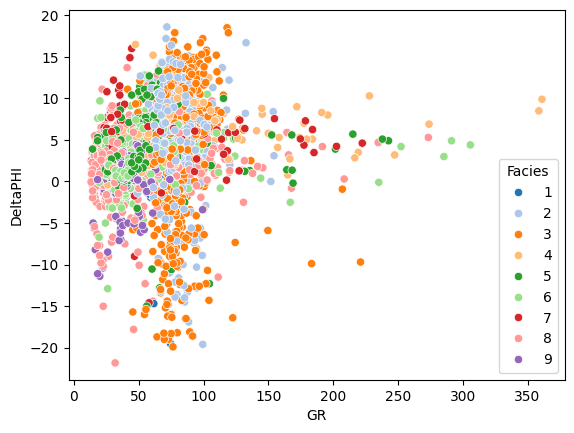

In [10]:
sns.scatterplot(data=data, x=GR, y=DeltaPHI, palette='tab20', hue="Facies")

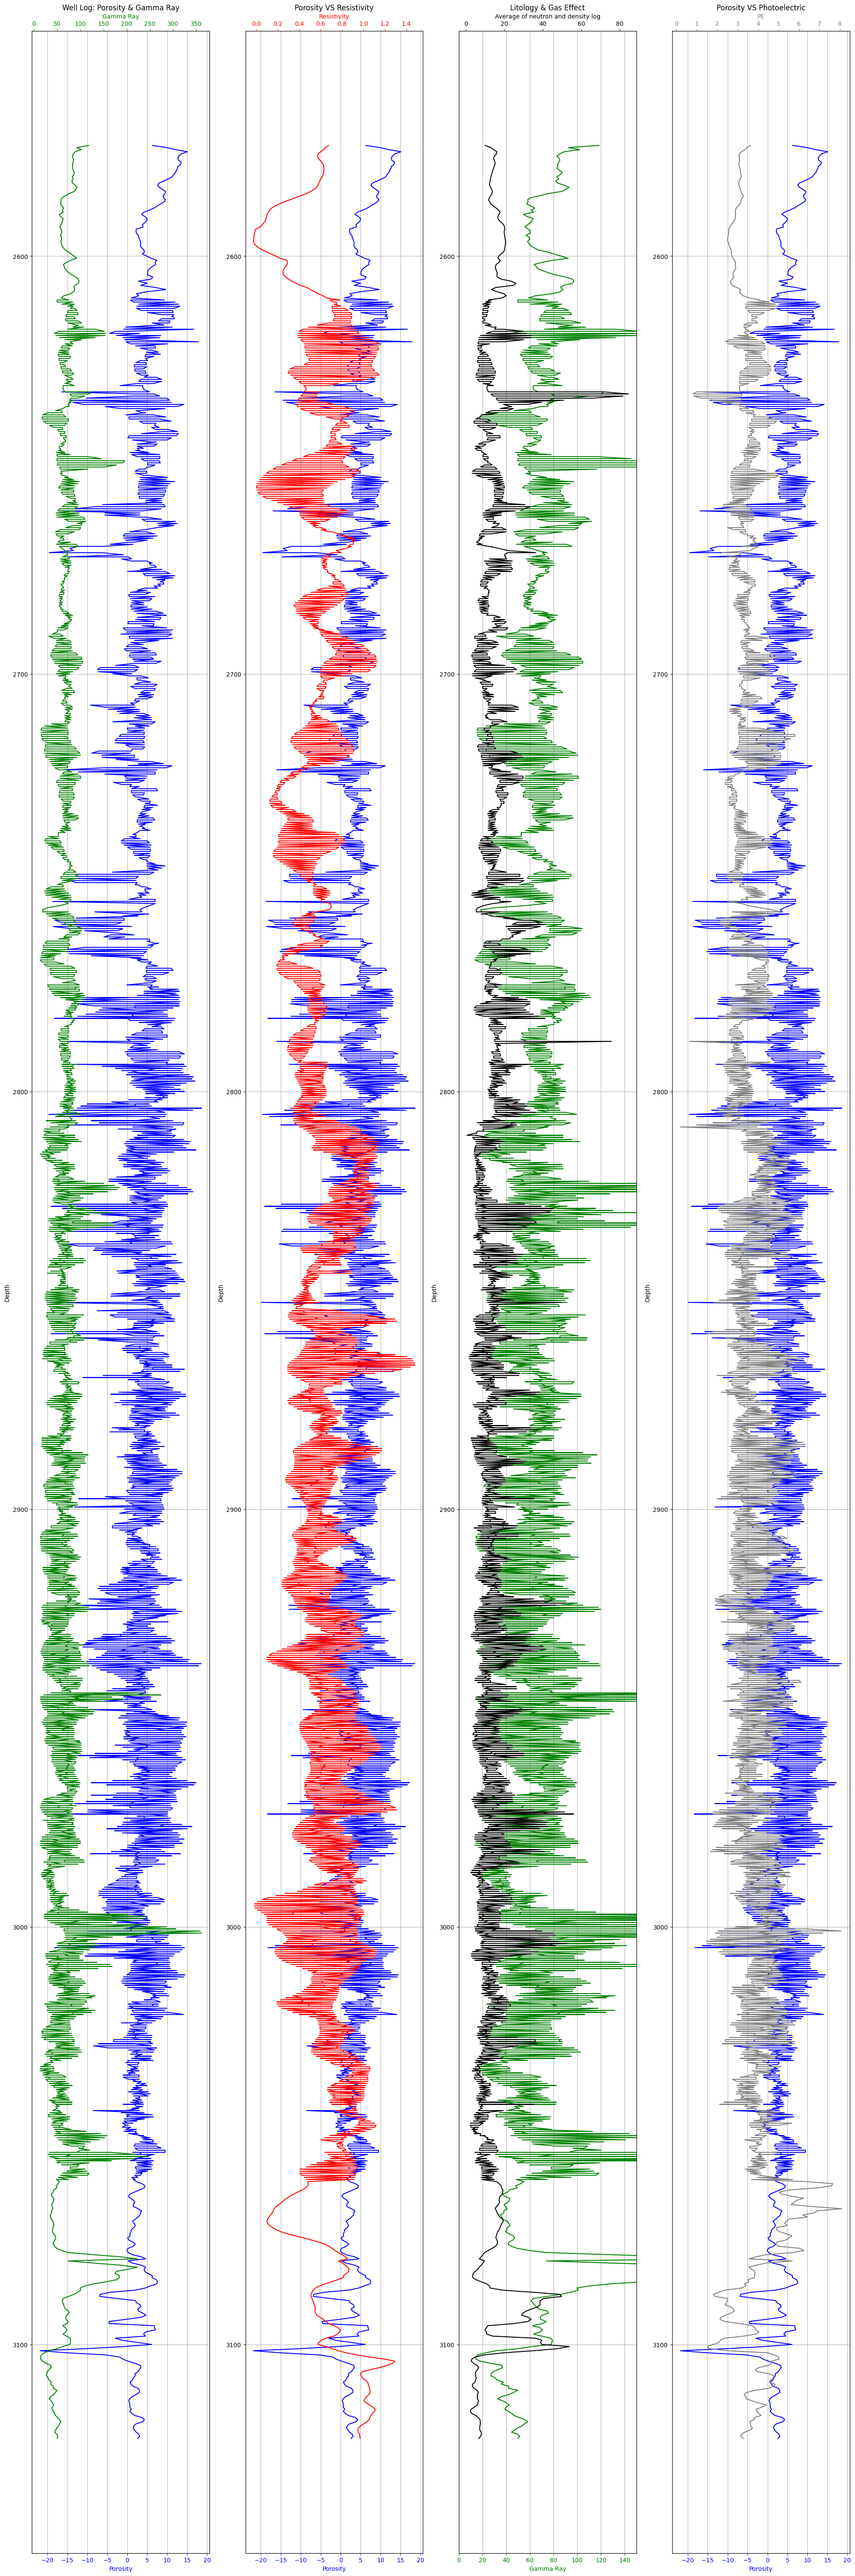

In [11]:
import matplotlib.pyplot as plt
import numpy as np

#data = data.sort_values("Depth").reset_index(drop=True)
data = data.sort_values(by='Depth').reset_index(drop=True)

depth = data["Depth"]
GR = data["GR"]
ILD_log10 = data["ILD_log10"]
DeltaPHI = data["DeltaPHI"]
PHIND = data["PHIND"]
PE = data["PE"]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,60))

# Plot Porosity VS Gamma Ray
ax1.plot(DeltaPHI, depth, color='Blue')
ax1.set_xlabel('Porosity')
ax1.set_ylabel('Depth')
ax1.set_title('Well Log: Porosity & Gamma Ray')

ax1.invert_yaxis()
ax1.grid(True)

ax1a = ax1.twiny()

ax1a.plot(GR, depth, color='Green')
ax1a.set_xlabel('Gamma Ray')

ax1.tick_params(axis='x', colors='Blue')
ax1a.tick_params(axis='x', colors='Green')
ax1.xaxis.label.set_color('Blue')
ax1a.xaxis.label.set_color('green')


# Plot Porosity vs Resistivity
ax2.plot(DeltaPHI, depth, color='blue')
ax2.set_xlabel('Porosity')
ax2.set_ylabel('Depth')
ax2.set_title('Porosity VS Resistivity')

ax2.invert_yaxis()
ax2.grid(True)

ax2a = ax2.twiny()

ax2a.plot(ILD_log10, depth, color='red')
ax2a.set_xlabel('Resistivity')

ax2.tick_params(axis='x', colors='Blue')
ax2a.tick_params(axis='x', colors='red')
ax2.xaxis.label.set_color('Blue')
ax2a.xaxis.label.set_color('red')

# Plot Litology & Gas Effect
ax3.plot(GR, depth, color='green')
ax3.set_xlabel('Gamma Ray')
ax3.set_ylabel('Depth')
ax3.set_title('Litology & Gas Effect')

ax3.invert_yaxis()
ax3.grid(True)

ax3a = ax3.twiny()

ax3a.plot(PHIND, depth, color='Black')
ax3a.set_xlabel('Average of neutron and density log')

ax3.set_xlim(0, 150)
ax3.tick_params(axis='x', colors='green')
ax3a.tick_params(axis='x', colors='Black')
ax3.xaxis.label.set_color('green')
ax3a.xaxis.label.set_color('Black')



# Plot Porosity VS Photoelectric
ax4.plot(DeltaPHI,depth , color='Blue')
ax4.set_xlabel('Porosity')
ax4.set_ylabel('Depth')
ax4.set_title('Porosity VS Photoelectric')

ax4.invert_yaxis()
ax4.grid(True)

ax4a = ax4.twiny()

ax4a.plot(PE, depth, color='grey')
ax4a.set_xlabel('PE')

ax4.tick_params(axis='x', colors='Blue')
ax4a.tick_params(axis='x', colors='gray')
ax4.xaxis.label.set_color('Blue')
ax4a.xaxis.label.set_color('grey')



plt.tight_layout()
plt.show()

#Porosity vs Gamma ray
Secara keseluruhan, plot ini menunjukkan adanya perulangan antara zona reservoir (Gamma Ray rendah, Porosity tinggi) dan zona non-reservoir/penudung (Gamma Ray tinggi, Porosity rendah). Interval di mana kedua kurva menunjukkan divergensi (Hijau ke kiri, Biru ke kanan) adalah target utama untuk evaluasi lebih lanjut terhadap potensi kandungan hidrokarbon.

*Overall, this plot shows a loop between the reservoir zone (low Gamma Ray, high Porosity) and the non-reservoir/cover zone (high Gamma Ray, low Porosity). The intervals where the two curves show divergence (Green to the left, Blue to the right) are the main targets for further evaluation of hydrocarbon potential.*

#Porosity vs Resistivity
Data ini menunjukkan beberapa interval dengan kombinasi ideal (Porositas Tinggi dan Resistivitas Tinggi), terutama di bagian tengah-atas dan tengah-bawah, yang merupakan prospek hidrokarbon yang kuat. Diperlukan analisis lebih lanjut (seperti saturasi air) menggunakan persamaan Archie untuk mengkuantifikasi jumlah hidrokarbon yang ada.

*These data indicate several intervals with an ideal combination (High Porosity and High Resistivity), particularly in the upper-middle and lower-middle sections, which represent strong hydrocarbon prospects. Further analysis (such as water saturation) using the Archie equation is required to quantify the amount of hydrocarbons present.*

#Litologi dan Gas Effect
**Litologi**: Formasi terdiri dari perulangan lapisan Serpih (Shale) (GR Tinggi) dan lapisan Reservoir Bersih (GR Rendah, Porositas Tinggi).
**Kandungan Fluida**: Zona reservoir bersih (GR Rendah dan Porositas Tinggi) menunjukkan Efek Gas yang ditandai dengan persilangan Log Densitas dan Log Neutron.
**Prospek**: Zona tersebut adalah reservoir gas yang prospektif karena memiliki porositas yang baik (kemampuan menyimpan) dan diisi oleh fluida hidrokarbon ringan (gas).

*Lithology: The formation consists of repeated layers of Shale (High GR) and Clean Reservoir layers (Low GR, High Porosity). Fluid Content: The clean reservoir zone (Low GR and High Porosity) shows Gas Effect which is characterized by the intersection of Density Log and Neutron Log. Prospect: The zone is a prospective gas reservoir because it has good porosity (storage capacity) and is filled by light hydrocarbon fluids (gas).*

#Photoelectric vs Porosity
Penentuan Litologi Matriks: Nilai PE memberikan konfirmasi langsung mengenai jenis mineral matriks dari batuan yang poros. Misalnya, jika Anda melihat PE sebagian besar berada di sekitar 5.0 b/e di zona Porositas Tinggi, Anda dapat menyimpulkan bahwa reservoirnya adalah Batugamping.Kualitas Batuan: Perbandingan PE dengan Porosity membantu membedakan antara porositas yang baik dalam batuan bersih versus porositas dalam batuan kotor (shaly).PE stabil + Porositas Tinggi: Menunjukkan reservoir yang bersih dan berkualitas tinggi.PE berfluktuasi + Porositas Rendah: Menunjukkan batuan berlumpur/serpih atau batuan non-reservoir.

*Matrix Lithology Determination: PE values ​​provide direct confirmation of the matrix mineral type of the porous rock. For example, if you see PE mostly around 5.0 b/e in a High Porosity zone, you can conclude that the reservoir is Limestone. Rock Quality: The ratio of PE to Porosity helps distinguish between good porosity in clean rock versus porosity in shaly rock. Stable PE + High Porosity: Indicates a clean, high-quality reservoir. Fluctuating PE + Low Porosity: Indicates muddy/shaly or non-reservoir rock.*


In [12]:
data.head()

Facies Formation       Well Name   Depth       GR  ILD_log10  DeltaPHI  \
0       2     A1 SH  CROSS H CATTLE  2573.5  118.439   0.674494       6.3   
1       2     A1 SH  CROSS H CATTLE  2574.0   92.550   0.645226       9.9   
2       2     A1 SH  CROSS H CATTLE  2574.5  102.168   0.630021      12.0   
3       2     A1 SH  CROSS H CATTLE  2575.0   88.898   0.600319      15.1   
4       2     A1 SH  CROSS H CATTLE  2575.5   85.493   0.578639      13.6   

   PHIND     PE  NM_M  RELPOS  
0   9.95  3.631     1   1.000  
1  13.05  3.450     1   0.987  
2  14.50  3.364     1   0.974  
3  16.05  3.187     1   0.961  
4  15.90  3.099     1   0.947

**ML MODEL**

In [13]:
#FEATURE
feature = ['GR','ILD_log10','PE','DeltaPHI','PHIND']

#Filter data model
data = data[feature + ['Depth']].dropna()

X = data[feature]




In [14]:
#Preprocesing - Standarizations
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)


In [15]:
#Model Training

n_rocktype = 4 #Jumlah klasifikasi yang kita inginkan

#KMeans
from sklearn.cluster import KMeans
KMeans= KMeans(n_clusters=n_rocktype, random_state=42, n_init=20 )
label_KMeans = KMeans.fit_predict(X_standard)
data['KMeans'] = label_KMeans

#GMM
from sklearn.mixture import GaussianMixture
GaussianMixture = GaussianMixture(n_components=n_rocktype, covariance_type='full', random_state=42)
label_GM = GaussianMixture.fit_predict(X_standard)
data['GM'] = label_GM

data.head()

GR  ILD_log10     PE  DeltaPHI  PHIND   Depth  KMeans  GM
0  118.439   0.674494  3.631       6.3   9.95  2573.5       1   3
1   92.550   0.645226  3.450       9.9  13.05  2574.0       1   0
2  102.168   0.630021  3.364      12.0  14.50  2574.5       1   0
3   88.898   0.600319  3.187      15.1  16.05  2575.0       1   0
4   85.493   0.578639  3.099      13.6  15.90  2575.5       1   0

In [16]:
#ML Evaluations
from sklearn.metrics import silhouette_score

SL_KMeans = silhouette_score(X_standard, label_KMeans)
SL_GM = silhouette_score(X_standard,label_GM)

Results = pd.DataFrame({"Model": ["KMeans", "GM"],"Silhouette": [SL_KMeans, SL_GM]})
print(Results)

    Model  Silhouette
0  KMeans    0.346520
1      GM    0.257148


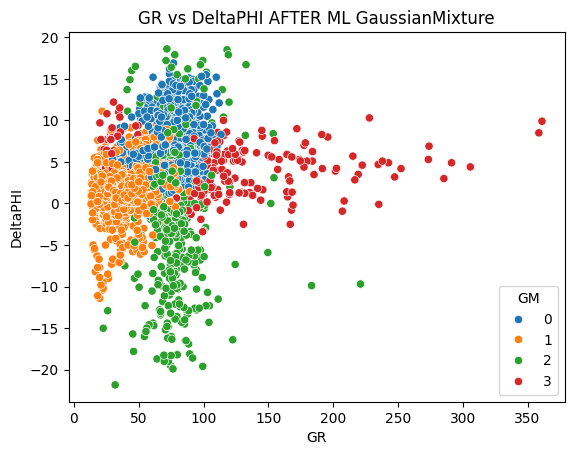

In [17]:
sns.scatterplot(data=data, x=GR, y=DeltaPHI, palette='tab10', hue="GM")
plt.title('GR vs DeltaPHI AFTER ML GaussianMixture')
plt.show()


Grafik sebar ini memvisualisasikan hasil pengelompokan data menggunakan algoritma Gaussian Mixture Model (GMM) berdasarkan hubungan antara variabel Gamma Ray (GR) dan DeltaPHI, yang menghasilkan empat klaster berbeda dengan batas antar-grup yang lebih fleksibel dibandingkan metode berbasis jarak konvensional. Klaster 3 (merah) mencakup data dengan nilai GR yang sangat tinggi dan tersebar secara horizontal, sementara klaster 0, 1, dan 2 terkonsentrasi pada area GR rendah hingga menengah namun terstratifikasi secara vertikal berdasarkan nilai koreksi densitasnya. Pendekatan probabilitas dari GMM ini memberikan perspektif baru dalam mengidentifikasi transisi litologi dan anomali data di sepanjang sumur, melengkapi analisis pengelompokan yang telah dilakukan sebelumnya.

*This scatter plot visualizes the data clustering results using the Gaussian Mixture Model (GMM) algorithm based on the relationship between Gamma Ray (GR) and DeltaPHI variables, resulting in four distinct clusters with more flexible boundaries compared to conventional distance-based methods. Cluster 3 (red) encompasses data with very high GR values and is horizontally dispersed, while clusters 0, 1, and 2 are concentrated in the low-to-medium GR areas but are vertically stratified based on their density correction values. The probabilistic approach of GMM provides a new perspective in identifying lithological transitions and data anomalies along the well, complementing previously performed clustering analyses.*

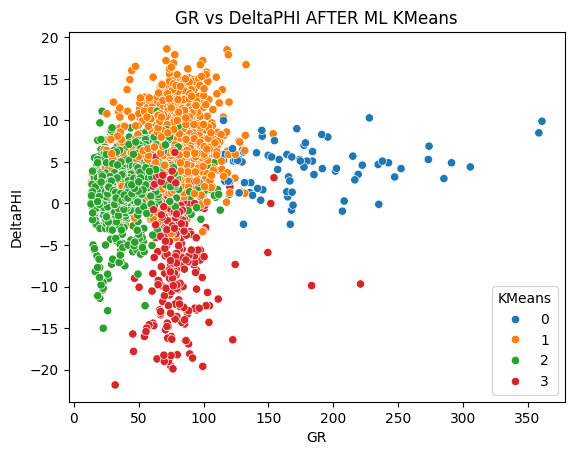

In [18]:
sns.scatterplot(data=data, x=GR, y=DeltaPHI, palette='tab10', hue="KMeans")
plt.title('GR vs DeltaPHI AFTER ML KMeans')
plt.show()

Grafik sebar ini menunjukkan hasil pengelompokan data menggunakan algoritma K-Means berdasarkan hubungan antara Gamma Ray (GR) dan koreksi densitas (DeltaPHI), di mana data berhasil terbagi menjadi empat klaster utama yang direpresentasikan oleh warna berbeda. Klaster 0 (biru) tampak mendominasi area dengan nilai GR tinggi (>150 API) yang umumnya mengindikasikan lapisan shale, sementara klaster 1, 2, dan 3 terkonsentrasi pada rentang GR yang lebih rendah namun terpisah berdasarkan variasi nilai DeltaPHI mereka. Distribusi ini membantu dalam mengidentifikasi pola kualitas data dan litologi pasca-proses pembelajaran mesin, memberikan pemahaman visual tentang bagaimana algoritma mengelompokkan karakteristik fisik batuan yang serupa di dalam sumur.

*This scatter plot illustrates the data clustering results using the K-Means algorithm based on the relationship between Gamma Ray (GR) and density correction (DeltaPHI), where the data is successfully partitioned into four primary clusters represented by distinct colors. Cluster 0 (blue) predominantly occupies the high GR value area (>150 API), which typically indicates shale layers, while clusters 1, 2, and 3 are concentrated within lower GR ranges but are separated based on their varying DeltaPHI values. This distribution assists in identifying data quality and lithology patterns post-machine learning, providing a visual understanding of how the algorithm groups similar physical rock characteristics within the well*

In [19]:
#plt.figure(figsize=(6,5))
#sns.scatterplot(
#x=data['GR']
#y=data['PHIND']
#hue=data['RT_km']
#palette='tab10')

#plt.xlabel('PE')


In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# 1. Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Define Model
# n_clusters disesuaikan dengan jumlah facies (9)
agglo_model = AgglomerativeClustering(n_clusters=9, linkage='ward')

# 3. Fit & Predict
agglo_labels = agglo_model.fit_predict(X_scaled)

Mulai Evaluasi...

--- K-Means Evaluation ---
Number of Clusters: 9
Noise Points (Outliers): 0
Silhouette Score (Higher is better): 0.2374
Davies-Bouldin Index (Lower is better): 1.3173
------------------------------
--- DBSCAN Evaluation ---
Number of Clusters: 12
Noise Points (Outliers): 1557
Silhouette Score (Higher is better): -0.1644
Davies-Bouldin Index (Lower is better): 1.7393
------------------------------


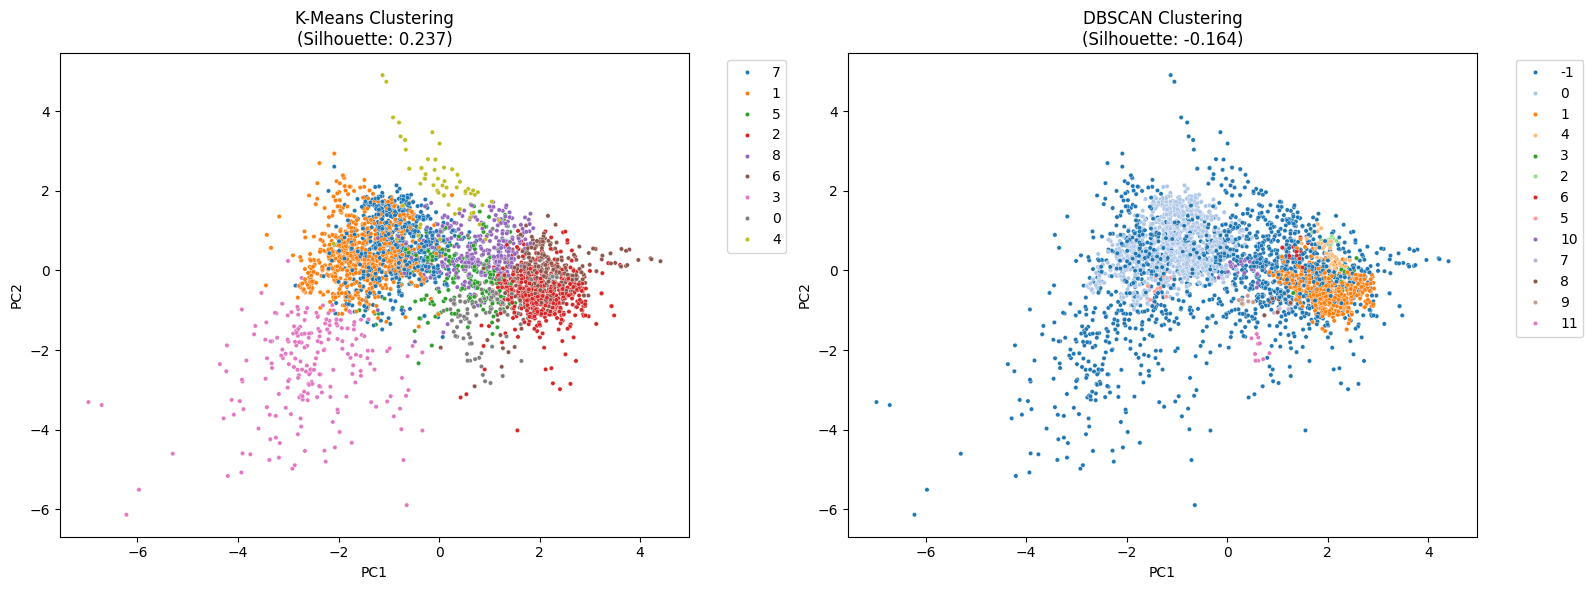

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 1. Load Data
data = pd.read_csv('facies_data2.csv')

features = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']
X = data[features].dropna() # Hapus baris kosong jika ada

# 2. Preprocessing (Standardization)
# Sangat penting untuk DBSCAN dan K-Means agar skala data sama
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================================
# MODEL 1: K-MEANS (Sebagai Pembanding)
# ==========================================
# Kita gunakan n_clusters=9 (asumsi jumlah facies ada 9 berdasarkan data umum facies)
kmeans = KMeans(n_clusters=9, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# ==========================================
# MODEL 2: DBSCAN (Model Baru)
# ==========================================
# eps: radius lingkungan (perlu dituning, coba 0.5 - 1.0 untuk data terstandarisasi)
# min_samples: minimal titik untuk dianggap cluster
dbscan = DBSCAN(eps=0.6, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# ==========================================
# 3. EVALUATION METRICS
# ==========================================

def evaluate_model(name, X, labels):
    # Filter out noise (-1) for DBSCAN evaluation purely on clusters (optional but fair)
    # Jika semua dianggap noise, return error
    if len(set(labels)) < 2:
        return None

    sil_score = silhouette_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print(f"--- {name} Evaluation ---")
    print(f"Number of Clusters: {n_clusters}")
    print(f"Noise Points (Outliers): {n_noise}")
    print(f"Silhouette Score (Higher is better): {sil_score:.4f}")
    print(f"Davies-Bouldin Index (Lower is better): {db_score:.4f}")
    print("-" * 30)
    return sil_score, db_score

print("Mulai Evaluasi...\n")
k_metrics = evaluate_model("K-Means", X_scaled, kmeans_labels)
d_metrics = evaluate_model("DBSCAN", X_scaled, dbscan_labels)


# Reduksi dimensi ke 2D supaya bisa digambar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Membuat DataFrame untuk plotting
plot_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
plot_df['KMeans_Labels'] = kmeans_labels.astype(str)
plot_df['DBSCAN_Labels'] = dbscan_labels.astype(str)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot K-Means
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='KMeans_Labels', palette='tab10', ax=axes[0], s=10)
axes[0].set_title(f'K-Means Clustering\n(Silhouette: {k_metrics[0]:.3f})')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc=2)

# Plot DBSCAN
# Warna -1 biasanya abu-abu atau hitam untuk noise
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='DBSCAN_Labels', palette='tab20', ax=axes[1], s=10)
axes[1].set_title(f'DBSCAN Clustering\n(Silhouette: {d_metrics[0]:.3f})')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.tight_layout()
plt.show()

Visualisasi ini membandingkan hasil algoritma K-Means dan DBSCAN Clustering menggunakan teknik reduksi dimensi Principal Component Analysis (PCA), di mana terlihat bahwa K-Means menghasilkan pengelompokan yang lebih terdefinisi dengan skor silhouette positif sebesar 0.237 dibandingkan DBSCAN yang memiliki skor negatif -0.164. Struktur klaster pada K-Means menunjukkan partisi data yang lebih merata di sepanjang sumbu PC1 dan PC2, sementara hasil DBSCAN menunjukkan dominasi satu klaster besar dengan banyak titik data yang dianggap sebagai noise (label -1), mengindikasikan bahwa distribusi data ini mungkin lebih cocok didekati dengan metode berbasis centroid daripada berbasis kepadatan dalam ruang fitur yang ada.

*This visualization compares the results of K-Means and DBSCAN clustering algorithms using Principal Component Analysis (PCA) for dimensionality reduction, where K-Means produces more well-defined groupings with a positive silhouette score of 0.237 compared to DBSCAN's negative score of -0.164. The cluster structure in K-Means shows more even data partitioning along the PC1 and PC2 axes, whereas the DBSCAN results are dominated by a single large cluster with many data points categorized as noise (label -1), indicating that this specific data distribution may be better suited for centroid-based methods rather than density-based approaches within the current feature space.*

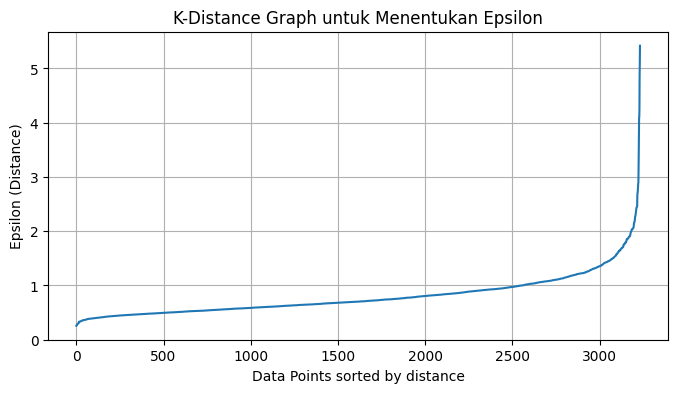

In [22]:
# Mencari nilai Epsilon (eps) terbaik menggunakan Nearest Neighbors
from sklearn.neighbors import NearestNeighbors

# Hitung jarak ke tetangga terdekat ke-10 (sesuai min_samples=10)
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Urutkan dan plot jaraknya
distances = np.sort(distances[:,9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('K-Distance Graph untuk Menentukan Epsilon')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon (Distance)')
plt.grid(True)
plt.show()

"Grafik K-Distance ini digunakan untuk menentukan nilai ambang batas optimal (Epsilon) dalam algoritma clustering berbasis kepadatan seperti DBSCAN, dengan mencari titik 'siku' atau perubahan kemiringan yang tajam pada kurva. Berdasarkan visualisasi, kurva menunjukkan peningkatan jarak yang stabil hingga sekitar titik data ke-3000, sebelum melonjak drastis pada nilai Epsilon di atas 1.5. Titik belok ini mengindikasikan bahwa nilai Epsilon yang dipilih harus berada di area transisi tersebut untuk membedakan antara titik data yang membentuk klaster padat dengan titik-titik anomali atau noise yang memiliki jarak antar-tetangga sangat jauh."

*"This K-Distance graph is utilized to determine the optimal threshold value (Epsilon) for density-based clustering algorithms like DBSCAN by identifying the 'elbow' point or the sharp change in curvature. Based on the visualization, the curve shows a steady increase in distance up to approximately the 3000th data point, before spiking dramatically at Epsilon values above 1.5. This inflection point indicates that the chosen Epsilon value should reside within this transition zone to effectively distinguish between core data points forming dense clusters and anomalies or noise that exhibit significantly larger nearest-neighbor distances."*

In [25]:
import matplotlib.colors as colors

#  Definisi Warna Standar Facies (agar konsisten di semua grafik)
# Urutan: SS, CSiS, FSiS, SiSh, MS, WS, D, PS, BS
facies_colors = ['#F4D03F', '#F5B041', '#DC7633', '#6E2C00',
                 '#1B4F72', '#2E86C1', '#AED6F1', '#A569BD', '#196F3D']
cmap_facies = colors.ListedColormap(facies_colors[0:9], 'indexed')

print("Data berhasil dimuat!")
print("Jumlah Sumur:", data['Well Name'].unique())

Data berhasil dimuat!
Jumlah Sumur: ['SHRIMPLIN' 'SHANKLE' 'LUKE G U' 'CROSS H CATTLE' 'NOLAN' 'Recruit F9'
 'NEWBY' 'CHURCHMAN BIBLE']


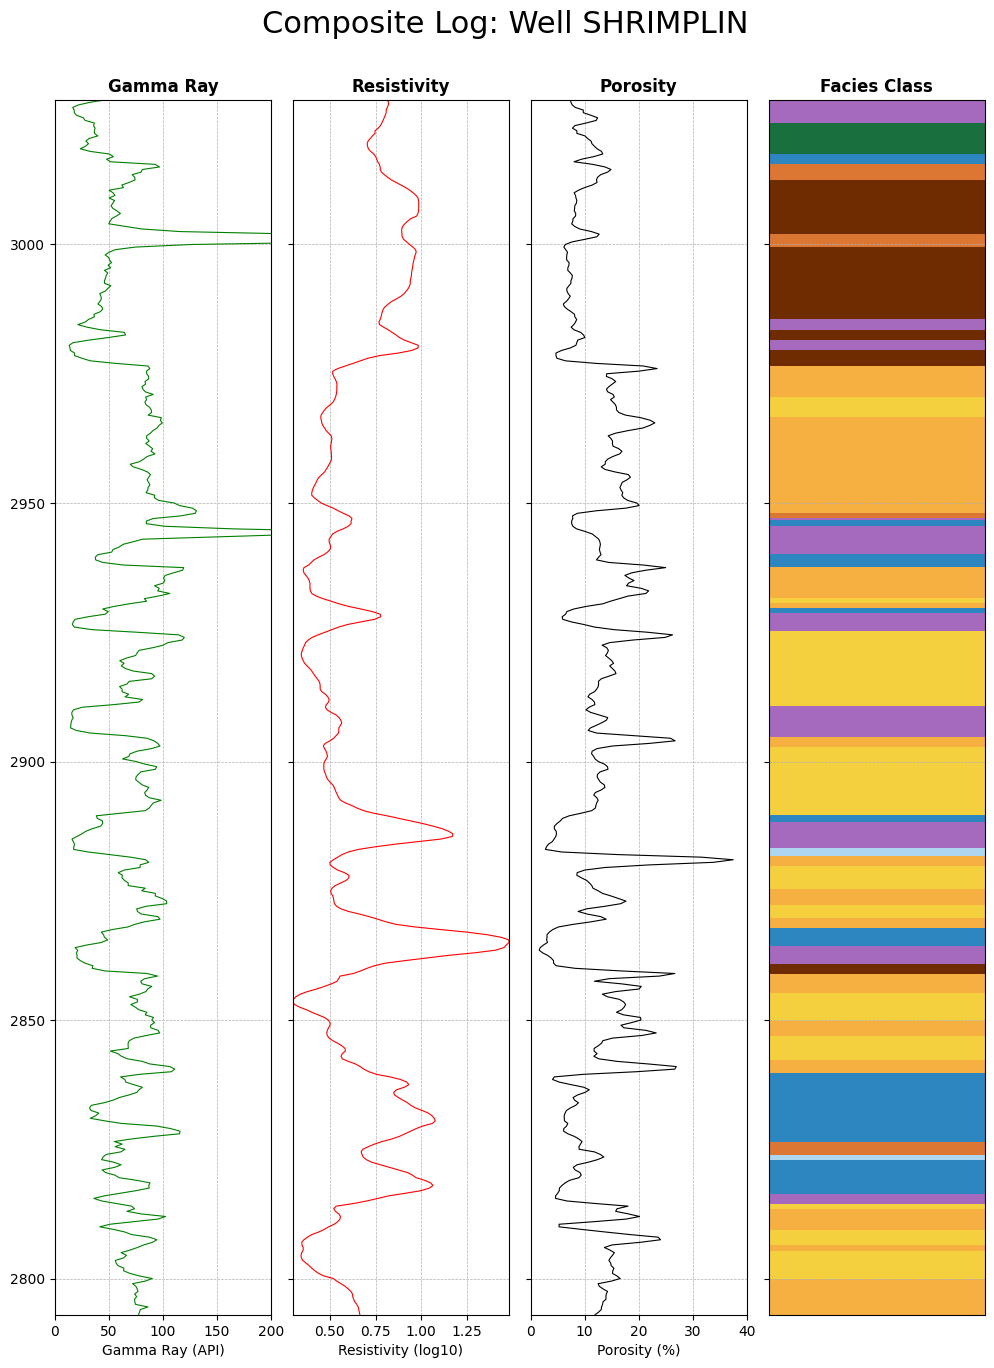

In [27]:
# Pilih nama sumur yang ingin divisualisasikan
well_name = 'SHRIMPLIN'  # Bisa diganti dengan 'SHANKLE', 'LUKE G U', dll.

# Filter data sumur tersebut
well_data = data[data['Well Name'] == well_name].sort_values(by='Depth')

# Setup Figure (4 Track)
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 15), sharey=True)
fig.suptitle(f'Composite Log: Well {well_name}', fontsize=22)
fig.subplots_adjust(top=0.92, wspace=0.1)

# Loop untuk setting sumbu Y (Depth) di semua track
for axes in ax:
    axes.set_ylim(well_data['Depth'].max(), well_data['Depth'].min())
    axes.invert_yaxis()
    axes.grid(True, which='both', linestyle='--', linewidth=0.5)
    axes.get_xaxis().set_visible(False)

# Track 1: Gamma Ray
ax[0].plot(well_data['GR'], well_data['Depth'], color='green', linewidth=0.8)
ax[0].set_xlabel("Gamma Ray (API)")
ax[0].set_xlim(0, 200)
ax[0].get_xaxis().set_visible(True)
ax[0].set_title("Gamma Ray", fontweight='bold')

# Track 2: Resistivity
ax[1].plot(well_data['ILD_log10'], well_data['Depth'], color='red', linewidth=0.8)
ax[1].set_xlabel("Resistivity (log10)")
ax[1].set_xlim(well_data['ILD_log10'].min(), well_data['ILD_log10'].max())
ax[1].get_xaxis().set_visible(True)
ax[1].set_title("Resistivity", fontweight='bold')

# Track 3: Porosity
ax[2].plot(well_data['PHIND'], well_data['Depth'], color='black', linewidth=0.8)
ax[2].set_xlabel("Porosity (%)")
ax[2].set_xlim(0, 40)
ax[2].get_xaxis().set_visible(True)
ax[2].set_title("Porosity", fontweight='bold')

# Track 4: Facies Bar
# Kita perlu melebarkan data facies agar bisa jadi image/bar
cluster = np.repeat(np.expand_dims(well_data['Facies'].values, 1), 100, 1)
ax[3].imshow(cluster, interpolation='none', aspect='auto', cmap=cmap_facies,
             extent=[0, 1, well_data['Depth'].max(), well_data['Depth'].min()])
ax[3].set_xlabel("Facies")
ax[3].set_title("Facies Class", fontweight='bold')
ax[3].set_xticklabels([])

plt.show()

"Visualisasi Composite Log sumur SHRIMPLIN ini mendemonstrasikan validitas data input kita, di mana terlihat keselarasan presisi antara defleksi kurva log fisika batuan (Gamma Ray, Resistivitas, dan Porositas) dengan zonasi pada Facies Class. Secara khusus, zona reservoir batupasir (blok warna kuning/oranye) konsisten berasosiasi dengan nilai Gamma Ray yang rendah dan porositas yang berkembang, kontras dengan zona shale atau non-reservoir (blok warna cokelat/gelap) yang menunjukkan respons Gamma Ray tinggi, membuktikan bahwa fitur-fitur log ini memiliki daya diskriminasi yang kuat untuk digunakan dalam pelatihan model klasifikasi facies otomatis."

*"This SHRIMPLIN well Composite Log visualization demonstrates the validity of our input data, where we can see the precise alignment between the deflection of the rock physics log curves (Gamma Ray, Resistivity, and Porosity) with the zonation of the Facies Class. Specifically, the sandstone reservoir zone (yellow/orange blocks) is consistently associated with low Gamma Ray values ​​and developed porosity, in contrast to the shale or non-reservoir zone (brown/dark blocks) which shows a high Gamma Ray response, proving that these log features have strong discriminatory power for use in training an automated facies classification model."*

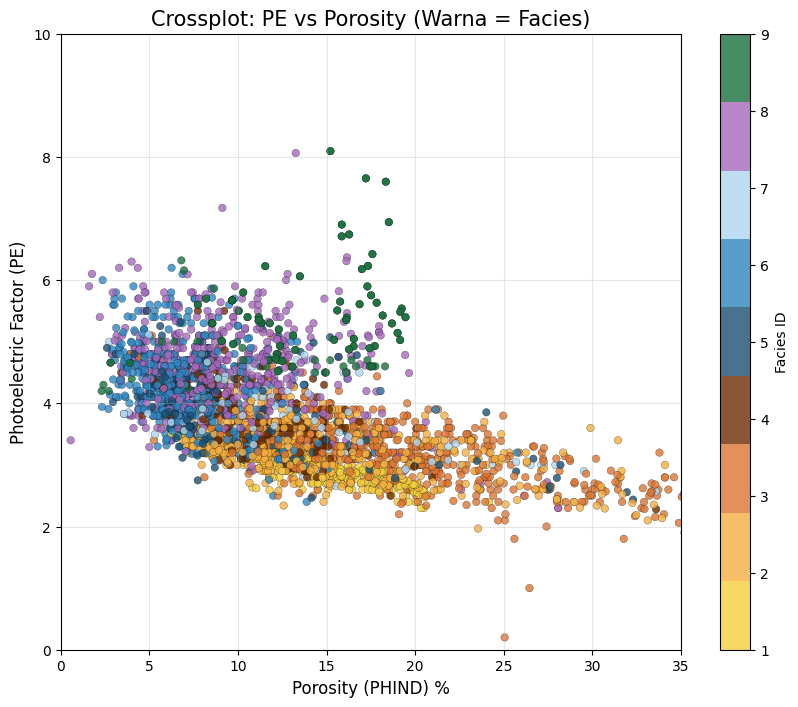

In [28]:
plt.figure(figsize=(10, 8))

# Scatter plot
scatter = plt.scatter(data['PHIND'], data['PE'], c=data['Facies'], s=30,
                      cmap=cmap_facies, alpha=0.8, edgecolors='black', linewidth=0.2)

# Label dan Judul
plt.xlabel('Porosity (PHIND) %', fontsize=12)
plt.ylabel('Photoelectric Factor (PE)', fontsize=12)
plt.title('Crossplot: PE vs Porosity (Warna = Facies)', fontsize=15)

# Setting batasan sumbu agar fokus ke area data
plt.xlim(0, 35)
plt.ylim(0, 10)

# Menambah Colorbar
cbar = plt.colorbar(scatter, ticks=range(1, 10))
cbar.set_label('Facies ID')

plt.grid(True, alpha=0.3)
plt.show()

Grafik ini menyajikan validasi geologi yang kuat melalui integrasi Composite Log sumur SHRIMPLIN dan Crossplot Petrofisika (PE vs Porositas). Pada profil log vertikal, kita melihat konsistensi zonasi di mana fasies reservoir (warna kuning/oranye) secara akurat berasosiasi dengan nilai Gamma Ray rendah dan porositas tinggi, kontras dengan zona non-reservoir (warna gelap). Temuan ini dikonfirmasi secara statistik oleh crossplot, yang menunjukkan separasi klaster yang tegas: kelompok fasies sandstone produktif (Facies 1-3) mengelompok di area porositas tinggi (>15%) dengan nilai Photoelectric Factor (PE) rendah khas kuarsa, terpisah jelas dari kelompok batuan tight (Facies 5-9) yang memiliki porositas rendah dan nilai PE yang lebih tinggi, membuktikan bahwa fitur-fitur ini memiliki daya diskriminasi yang sangat baik untuk klasifikasi fasies otomatis.

*This graph presents robust geological validation through the integration of SHRIMPLIN well Composite Logs and Petrophysical Crossplots (PE vs Porosity). In the vertical log profiles, we see a consistent zonation where reservoir facies (yellow/orange) are accurately associated with low Gamma Ray values ​​and high porosity, in contrast to non-reservoir zones (dark colors). This finding is statistically confirmed by the crossplot, which shows a clear cluster separation: productive sandstone facies groups (Facies 1-3) cluster in areas of high porosity (>15%) with low Photoelectric Factor (PE) values ​​typical of quartz, clearly separated from tight rock groups (Facies 5-9) with low porosity and higher PE values, proving that these features have excellent discriminatory power for automated facies classification.*

/tmp/ipython-input-3631130024.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Facies', y='PHIND', data=data, palette=facies_colors)


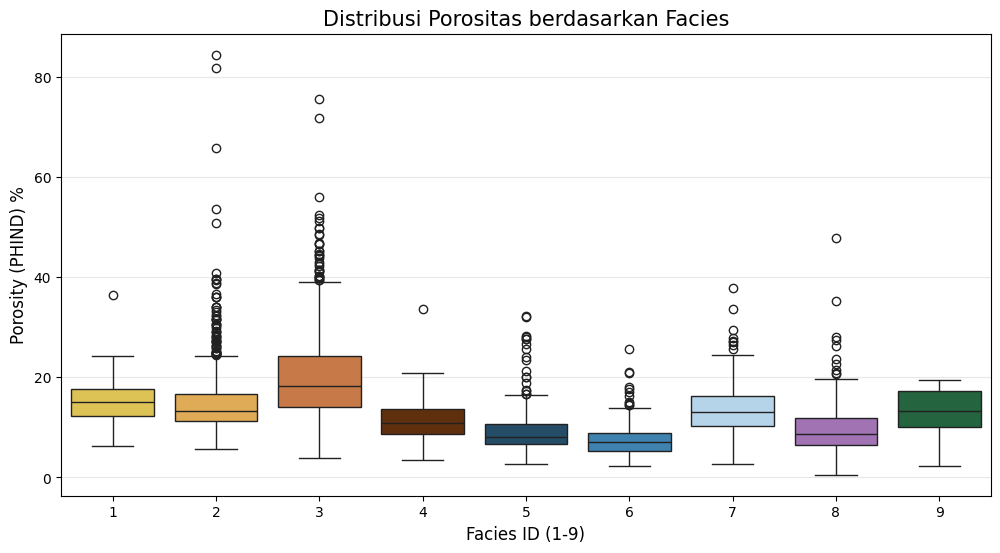

In [31]:
plt.figure(figsize=(12, 6))

# Membuat Boxplot dengan Seaborn
sns.boxplot(x='Facies', y='PHIND', data=data, palette=facies_colors)

# Label dan Judul
plt.title('Distribusi Porositas berdasarkan Facies', fontsize=15)
plt.xlabel('Facies ID (1-9)', fontsize=12)
plt.ylabel('Porosity (PHIND) %', fontsize=12)

plt.grid(True, axis='y', alpha=0.3)
plt.show()

"Analisis integrasi data sumur SHRIMPLIN melalui Composite Log, Crossplot, dan Boxplot ini menegaskan bahwa porositas dan Photoelectric Factor (PE) berfungsi sebagai diskriminator utama yang sangat efektif dalam memisahkan zona reservoir dan non-reservoir. Secara konsisten, Facies 1, 2, dan 3 (zona berwarna kuning-oranye) teridentifikasi sebagai reservoir berkualitas tinggi dengan median porositas yang unggul (rata-rata di atas 15%) dan nilai PE rendah, kontras dengan Facies 4 hingga 9 yang cenderung memiliki karakteristik batuan tight (padat) dengan porositas rendah dan respons Gamma Ray yang tinggi. Keselarasan antara zonasi vertikal pada log, pemisahan klaster yang tegas pada crossplot, dan distribusi statistik pada boxplot memvalidasi bahwa pengelompokan fasies ini secara geologis akurat dan siap digunakan untuk pemodelan prediktif."

*"The integrated analysis of the SHRIMPLIN well data using the Composite Log, Crossplot, and Boxplot confirms that porosity and Photoelectric Factor (PE) serve as highly effective discriminators in separating reservoir from non-reservoir zones. Consistently, Facies 1, 2, and 3 (yellow-orange zones) are identified as high-quality reservoirs with superior median porosity (averaging above 15%) and low PE values, standing in sharp contrast to Facies 4 through 9, which exhibit tight rock characteristics with low porosity and high Gamma Ray responses. The alignment between the vertical zonation in the logs, the distinct cluster separation in the crossplot, and the statistical distribution in the boxplot validates that this facies clustering is geologically accurate and robust for predictive modeling."*

In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm import tqdm
import time
from IPython.display import display, HTML

# 1. Menampilkan Header Menarik dengan HTML
display(HTML("""
<div style="background-color:#2c3e50; padding:15px; border-radius:10px; border-left: 5px solid #e74c3c;">
  <h2 style="color:white; margin:0;">📊 Project: Petrophysical Quick Look</h2>
  <p style="color:#bdc3c7; margin:0;">Analisis Cepat Kualitas Reservoir (Dummy Data)</p>
</div>
<br>
<div class="alert alert-block alert-info">
  <b>ℹ️ Info:</b> Notebook ini mendemonstrasikan visualisasi interaktif data sumur (GR, Resistivity, Porosity).
</div>
"""))

In [8]:
# @title ⚙️ Parameter Filter Reservoir
# @markdown Tentukan nilai cutoff untuk menyoroti zona prospek ("Pay Zone").

# Membuat Data Dummy (Mirip Data Log Asli)
depth = np.arange(2000, 2100, 0.5)
n_samples = len(depth)

# Simulasi Log
np.random.seed(42)
gr_log = np.random.normal(60, 15, n_samples) + np.sin(depth/10)*20 # Gamma Ray
res_log = 10**(np.random.normal(0.5, 0.3, n_samples)) # Resistivity (Log)
phi_log = np.random.uniform(0.05, 0.25, n_samples) # Porosity

data = pd.DataFrame({'Depth': depth, 'GR': gr_log, 'Resistivity': res_log, 'Porosity': phi_log})

# --- INTERACTIVE FORM VARIABLES ---
gr_cutoff = 75 # @param {type:"slider", min:0, max:150, step:5}
porosity_cutoff = 0.13 # @param {type:"slider", min:0.0, max:0.3, step:0.01}

print(f"\n🔄 Sedang menghitung Net Pay dengan Cutoff GR < {gr_cutoff}...")
pay_zones = []

# Menggunakan TQDM untuk Progress Bar
for i in tqdm(range(len(data)), desc="Processing Rows"):
    time.sleep(0.005) # Simulasi loading time
    if data.loc[i, 'GR'] < gr_cutoff and data.loc[i, 'Porosity'] > porosity_cutoff:
        pay_zones.append('PAY')
    else:
        pay_zones.append('NON-PAY')

data['Zone_Status'] = pay_zones


🔄 Sedang menghitung Net Pay dengan Cutoff GR < 75...


Processing Rows: 100%|██████████| 200/200 [00:01<00:00, 180.55it/s]


In [11]:
display(HTML("<h3>📈 Interactive Well Log Plot</h3>"))
display(HTML("<div class='alert alert-block alert-success'><b>💡 Tips:</b> Arahkan mouse ke grafik untuk melihat nilai angka. Gunakan fitur zoom untuk detail.</div>"))

# Membuat 3 Track Log (Triple Combo Style)
fig = make_subplots(rows=1, cols=3, shared_yaxes=True,
                    subplot_titles=("Gamma Ray (API)", "Resistivity (ohm.m)", "Porosity (v/v)"))

# Track 1: Gamma Ray
fig.add_trace(go.Scatter(x=data['GR'], y=data['Depth'], name='GR', line=dict(color='green')), row=1, col=1)
# Garis Cutoff di Track 1
fig.add_vline(x=gr_cutoff, line_dash="dash", line_color="red", row=1, col=1, annotation_text="Cutoff")

# Track 2: Resistivity
fig.add_trace(go.Scatter(x=data['Resistivity'], y=data['Depth'], name='Resistivity', line=dict(color='red')), row=1, col=2)

# Track 3: Porosity
fig.add_trace(go.Scatter(x=data['Porosity'], y=data['Depth'], name='Porosity', line=dict(color='blue')), row=1, col=3)

# Update Layout agar mirip log sumur
fig.update_layout(height=600, width=1000, template="plotly_white", showlegend=False)
fig.update_yaxes(autorange="reversed", title_text="Depth (m)") # Membalik sumbu Y (Depth)
fig.update_xaxes(type="log", row=1, col=2) # Skala log untuk resistivity
fig.update_xaxes(range=[0, 150], row=1, col=1) # Skala GR
fig.update_xaxes(range=[0.5, 0], row=1, col=3) # Skala Porositas (Reverse scale is common)

fig.show()

# 📖 Panduan Interpretasi Log Sumur / Well Log Interpretation Guide
#1. Track 1: Gamma Ray (Kiri / Left)
# **Membaca radioaktivitas alami batuan.**

Nilai Rendah (Kiri): Menunjukkan batuan "bersih" seperti Sandstone (batu pasir) atau Karbonat. Ini adalah kandidat reservoir.
Nilai Tinggi (Kanan): Menunjukkan batuan "kotor" atau Shale (lempung).
Garis Putus-putus (Cutoff): Segala sesuatu di sebelah kiri garis merah ini dianggap sebagai zona potensial (Net Sand).

# *Measures the natural radioactivity of the rock.*

*Low Values (Left): Indicates "clean" rocks such as Sandstone or Carbonates.* **These are reservoir candidates.*
*High Values (Right): Indicates "dirty" rocks or Shale (clay)*.
*Dashed Line (Cutoff): Everything to the left of this red line is considered a potential Net Sand zone.*

#2. Track 2: Resistivity (Tengah / Center)
# Membaca kemampuan batuan/fluida menghambat arus listrik.

Menggunakan skala Logaritmik (0.1 ke 1000) karena perbedaan nilai yang ekstrem.
Resistivitas Tinggi: Menunjukkan adanya Hidrokarbon (minyak/gas) atau batuan yang sangat padat (tight). Minyak tidak menghantarkan listrik.
Resistivitas Rendah: Menunjukkan adanya Air Formasi (asin). Air garam sangat mudah menghantarkan listrik.
Kunci: Jika Gamma Ray rendah (sand) tapi Resistivitas tinggi, itu adalah indikasi kuat adanya zona minyak.

# *Measures the ability of rocks/fluids to impede electrical current.*

*Uses a Logarithmic scale (0.1 to 1000) due to extreme value ranges.*
*High Resistivity: Indicates the presence of Hydrocarbons (oil/gas) or very dense (tight) rocks. Oil does not conduct electricity.*
*Low Resistivity: Indicates the presence of Formation Water (salty). Saltwater is highly conductive.*
*Key: If Gamma Ray is low (sand) but Resistivity is high, it is a strong indication of an oil zone. *

#3. Track 3: Porosity (Kanan / Right)
#Persentase ruang kosong di dalam batuan.

Skala: Skala ini biasanya dibalik (nilai besar di kiri, nilai kecil di kanan).
Interpretasi: Semakin menjorok ke arah kiri, semakin besar ruang porinya (misal: 20-30%).
Kualitas: Reservoir yang bagus biasanya memiliki porositas di atas 10-15% (bergantung pada jenis batuannya).

#*The percentage of void space within the rock.*

*Scale: This scale is usually reversed (large values on the left, small values on the right).*
*Interpretation: The further it leans to the left, the larger the pore space (e.g., 20-30%).*
Quality: A good reservoir typically has porosity above 10-15% (depending on the rock type).
*italicized text*
#🖱️ Fitur Interaktif / Interactive Features
#**Hover (Arahkan Kursor):**

Tempelkan kursor pada garis log untuk melihat nilai presisi di kedalaman tertentu.

*Hover over the log lines to see precise values at specific depths.*

#**Zooming:**

Klik dan tarik area tertentu untuk memperbesar zona target. Semua track akan bergeser secara sinkron.

*Click and drag a specific area to enlarge target zones. All tracks will scroll synchronously.*

#**Toggle Legend:**

Klik nama log di legenda untuk menyembunyikan atau memunculkan garis tertentu.

*Click the log names in the legend to hide or show specific lines.*

#**Autoscale:**

Klik dua kali pada grafik untuk mengembalikan tampilan ke ukuran semula.

*Double-click on the graph to reset the view to the original size.*

#💡 The "Golden Rule"
#"Cari zona di mana Gamma Ray rendah, Resistivitas tinggi, dan Porositas juga tinggi. Itulah titik di mana kita kemungkinan besar menemukan cadangan minyak yang ekonomis."

#*"Look for zones where Gamma Ray is low, Resistivity is high, and Porosity is high. That is where we are most likely to find economic oil reserves."*